# Machine Learning Classification - Use Case : Titanic

##### Data diambil dari [titanic](https://www.kaggle.com/c/titanic)

#### Pada Problem atau use case ini memiliki tujuan untuk memprediksi mana penumpang yang selamat dan tidak selamat menggunakan data penumpang

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

### Load Dataset Titanic

In [2]:
df = pd.read_csv(r'C:\Users\Rahmat\Documents\Shift Academy\Batch 10\dataset\data_titanic.csv')

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### Initial Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Cleansing

**Check for duplicates**

In [5]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [6]:
df.duplicated().any()

False

**Check for missing values**

In [7]:
round(df.isnull().sum()/df.shape[0]*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [8]:
#drop Cabin
df.drop(columns=['Cabin'], inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

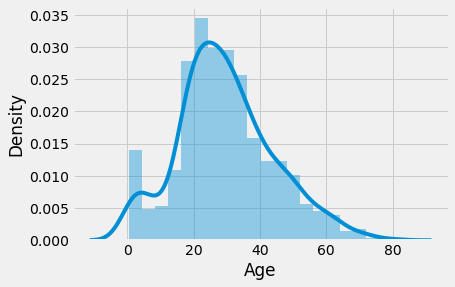

In [9]:
sns.distplot(df['Age'])

In [10]:
print('rata-rata :', df['Age'].mean())
print('Median :', df['Age'].median())

rata-rata : 29.69911764705882
Median : 28.0


In [11]:
#ganti dengan mean (kolom Age)
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

<AxesSubplot:>

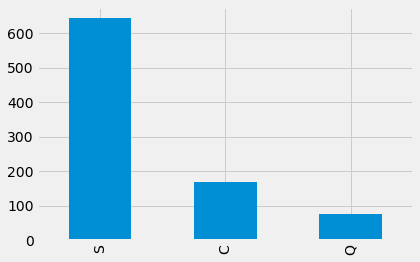

In [12]:
#Ganti embarked dengan Modus
df['Embarked'].value_counts().plot.bar()

In [13]:
modus_emb = df['Embarked'].mode()[0]
print(modus_emb)

S


In [14]:
df['Embarked'] = df['Embarked'].fillna(modus_emb)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

Check for Outliers

<AxesSubplot:xlabel='Age'>

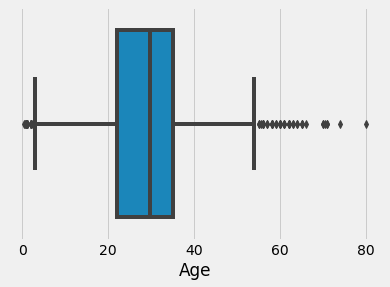

In [17]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Fare'>

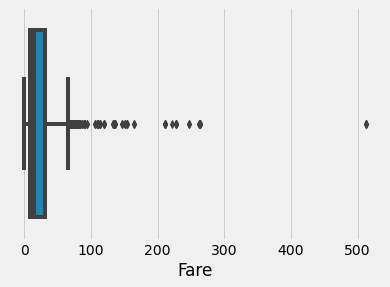

In [18]:
sns.boxplot(df['Fare'])

In [19]:
df[df['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


<AxesSubplot:xlabel='Fare', ylabel='Density'>

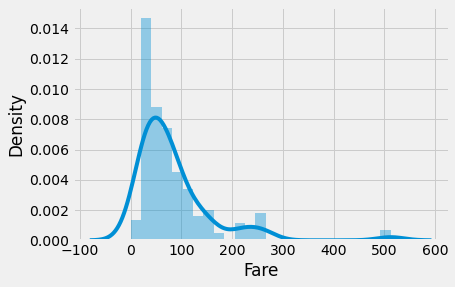

In [20]:
#melihat harga pada tipe class 1 yang memang terdapat harga diatas 500
sns.distplot(df[df['Pclass']==1]['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

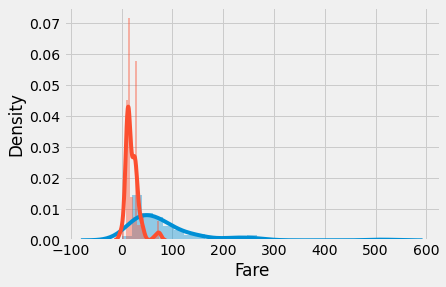

In [21]:
#kita bandingkan tipe kelas 1 dan 2, tipe kelas 2 cenderung kek kiri yang berarti banyak yg harganya murah
sns.distplot(df[df['Pclass']==1]['Fare'])
sns.distplot(df[df['Pclass']==2]['Fare'])

Some Visualization from Feature

<AxesSubplot:>

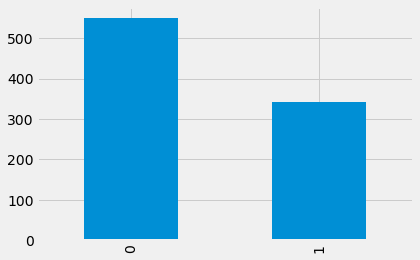

In [22]:
#melihat selamat dan tipe selamat dimana 0 adalah tidak selamat
df['Survived'].value_counts().plot.bar()

<AxesSubplot:xlabel='Survived', ylabel='count'>

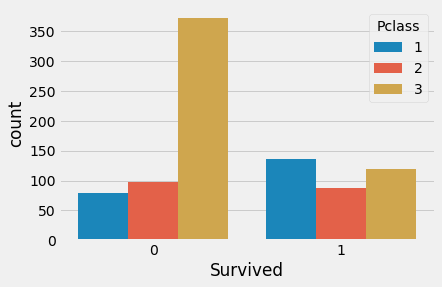

In [23]:
sns.countplot(df['Survived'], hue=df['Pclass'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

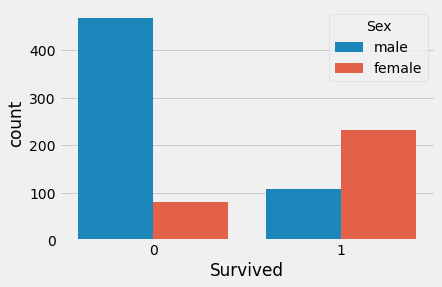

In [24]:
sns.countplot(df['Survived'], hue=df['Sex'])

### Data Preparation

In [25]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [26]:
#hapus kolom ID penumpang
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [27]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


### Encode Data

**Untuk data yang binary categorical akan menggunakan Label Encoder, sedangkan kolom kategori yang lebih dari 2 kita gunakan one hot encoding**

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
#encode kolom Sex
lE = LabelEncoder()
df['Sex'] = lE.fit_transform(df['Sex'])

In [30]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S


In [31]:
#encode embarked
df = pd.get_dummies(df, columns=['Embarked'], prefix=['Emb'], drop_first=True)

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


### Scaling

**Menyamakan skala atau range dari data**

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
df_scale = df.copy()

In [35]:
scale = MinMaxScaler()
df_scale['Age'] = scale.fit_transform(np.array(df_scale['Age']).reshape(-1, 1))

In [36]:
df_scale['Fare'] = scale.fit_transform(np.array(df_scale['Fare']).reshape(-1,1))

In [37]:
df_scale.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S
0,0,3,1,0.271174,1,0,0.014151,0,1
1,1,1,0,0.472229,1,0,0.139136,0,0
2,1,3,0,0.321438,0,0,0.015469,0,1
3,1,1,0,0.434531,1,0,0.103644,0,1
4,0,3,1,0.434531,0,0,0.015713,0,1


#### Check Correlation using Heatmap Seaborn

In [38]:
label = df_scale['Survived']
df_corr = df_scale.drop(columns=['Survived'])
df_corr['Label'] = label

In [39]:
df_corr.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S,Label
0,3,1,0.271174,1,0,0.014151,0,1,0
1,1,0,0.472229,1,0,0.139136,0,0,1
2,3,0,0.321438,0,0,0.015469,0,1,1


Text(0.5, 1.0, 'Heatmap Correlation for Survived')

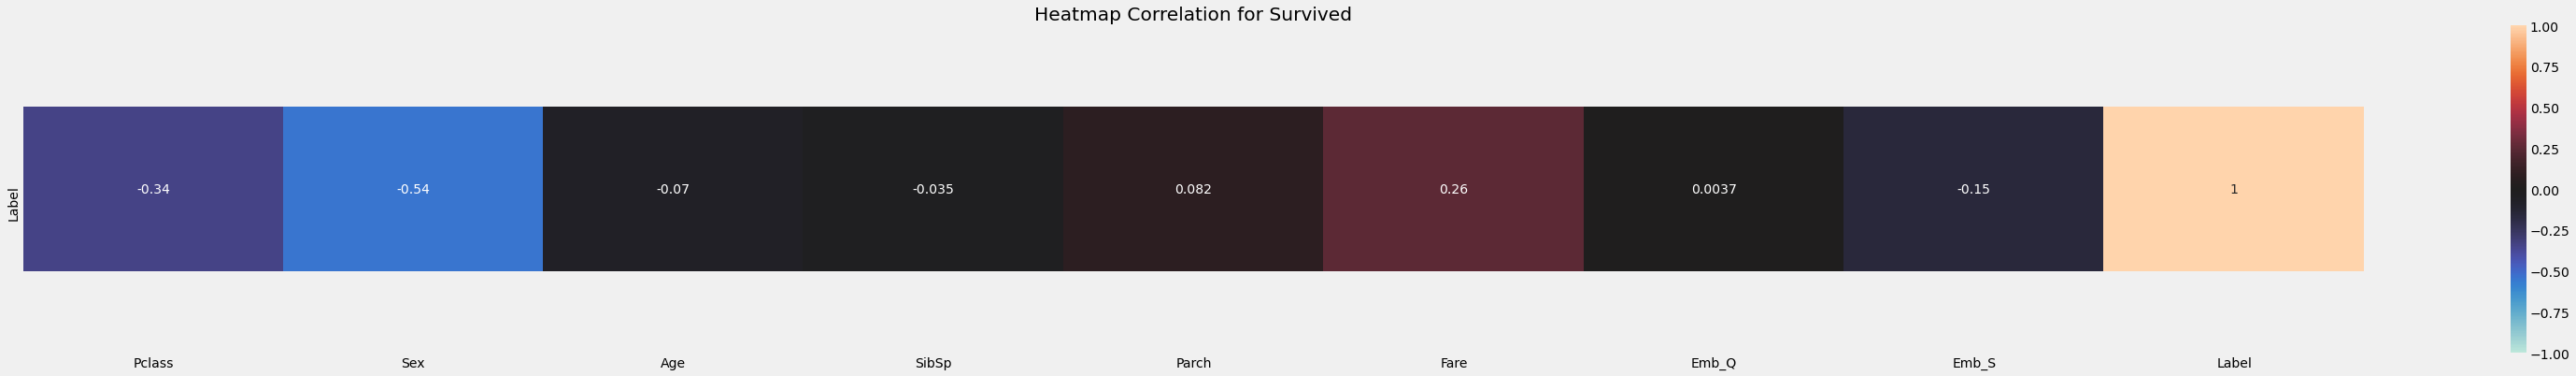

In [40]:
corr = df_corr.corr()
corr2 = corr.iloc[-1:,:]

plt.figure(figsize=(50, 6))
ax = sns.heatmap(corr2, annot=True, vmin=-1, vmax=1, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap Correlation for Survived')

### Train Test Split

**Memecaha data menjadi train dan test**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [43]:
X = df.drop(columns=['Survived']) #data independent
y = df['Survived'] #data dependent

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S
331,1,1,45.5,0,0,28.5000,0,1
733,2,1,23.0,0,0,13.0000,0,1
382,3,1,32.0,0,0,7.9250,0,1
704,3,1,26.0,1,0,7.8542,0,1
813,3,0,6.0,4,2,31.2750,0,1


In [46]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

### Build Model

**Model yang akan digunakan adalah Logistik Regression, K Neirest Neighbors, dan Random Forest**

### Logistic Regression

#### Disini dicoba menggunakan 2 package yaitu statsmodels dan sklearn

#### Dengan Statsmodels

In [47]:
import statsmodels.api as sm

exog = sm.add_constant(X_train)
log_reg = sm.Logit(y_train, exog).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.447688
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Tue, 06 Jul 2021   Pseudo R-squ.:                  0.3240
Time:                        13:09:53   Log-Likelihood:                -318.75
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 2.679e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8116      0.619      7.776      0.000       3.599       6.024
Pclass        -0.9763      0.

In [48]:
exog = sm.add_constant(X_train.drop(labels='Emb_Q', axis=1))
log_reg = sm.Logit(y_train, exog).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.447767
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Tue, 06 Jul 2021   Pseudo R-squ.:                  0.3239
Time:                        13:09:53   Log-Likelihood:                -318.81
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 4.123e-62
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7880      0.614      7.798      0.000       3.585       5.991
Pclass        -0.9867      0.

In [49]:
pred=log_reg.predict(sm.add_constant(X_test.drop(labels="Emb_Q",axis=1)))

In [50]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logreg on test data: ",accuracy_score(y_test,np.round(pred)))

Accuracy for Logreg on test data:  0.8044692737430168


In [51]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(y_test, np.round(pred))
CF

array([[89, 16],
       [19, 55]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
target_names = ['No Survived','Survived']
print(classification_report(y_test, np.round(pred), target_names=target_names))

              precision    recall  f1-score   support

 No Survived       0.82      0.85      0.84       105
    Survived       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



#### Dengan sklearn

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model_LR = LogisticRegression()

In [55]:
#training model
model_LR.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred_LR = model_LR.predict(X_test)

**Evaluation**

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

In [58]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



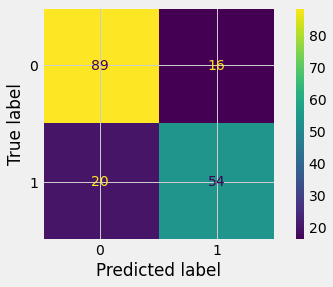

In [59]:
plot_confusion_matrix(model_LR, X_test, y_test)

In [60]:
roc_auc_score(y_test, y_pred_LR)

0.7886743886743887

**KNN**

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
round(np.sqrt(X_train.shape[0])) #menentukan jumlah k

27

In [63]:
model_KNN = KNeighborsClassifier(n_neighbors=27)

In [64]:
#training data
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [65]:
y_pred_knn = model_KNN.predict(X_test)

**Evaluation**

In [66]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       105
           1       0.83      0.47      0.60        74

    accuracy                           0.74       179
   macro avg       0.77      0.70      0.71       179
weighted avg       0.76      0.74      0.72       179



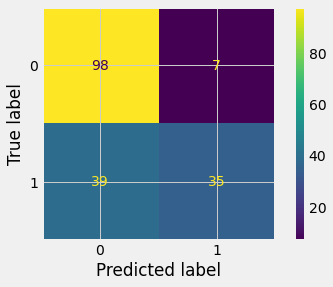

In [67]:
plot_confusion_matrix(model_KNN, X_test, y_test)

In [68]:
roc_auc_score(y_test, y_pred_knn)

0.7031531531531532

### ROC AUC Curve
#### Membandingkan ROC AUC Curve antara KNN dan Logistic Regression

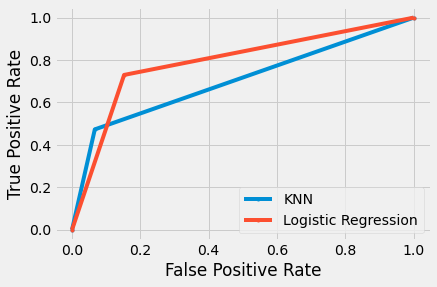

In [69]:
from sklearn.metrics import roc_curve

knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred_knn)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_LR)

# plot the roc curve for the model
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

# Sesi 28

## Support Vector Machine

In [70]:
from sklearn.svm import SVC

model_svm = SVC()

model_svm.fit(X_train, y_train)

#bikin predict
predict_svm = model_svm.predict(X_test)

Evaluation

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179



0.5998069498069498

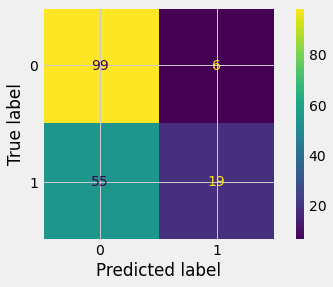

In [71]:
print(classification_report(y_test, predict_svm))
plot_confusion_matrix(model_svm, X_test, y_test)
roc_auc_score(y_test, predict_svm)

## Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train, y_train)

predict_dt = model_dt.predict(X_test)

Evaluation

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



0.7743886743886744

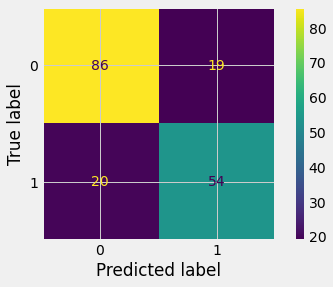

In [73]:
print(classification_report(y_test, predict_dt))
plot_confusion_matrix(model_dt, X_test, y_test)
roc_auc_score(y_test, predict_dt)

## Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

predict_rf = model_rf.predict(X_test)

Evaluation

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



0.7934362934362935

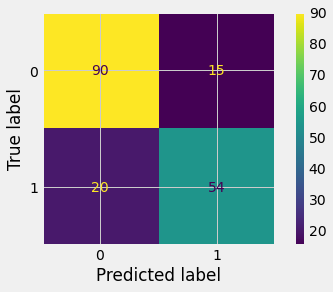

In [75]:
print(classification_report(y_test, predict_rf))
plot_confusion_matrix(model_rf, X_test, y_test)
roc_auc_score(y_test, predict_rf)

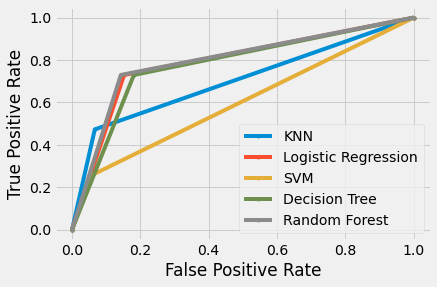

In [76]:
from sklearn.metrics import roc_curve

knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred_knn)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred_LR)
svm_fpr, svm_tpr, _ = roc_curve(y_test, predict_svm)
dt_fpr, dt_tpr, _ = roc_curve(y_test, predict_dt)
rf_fpr, rf_tpr, _ = roc_curve(y_test, predict_rf)

# plot the roc curve for the model
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

In [77]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S
0,0,3,1,22.000000,1,0,7.2500,0,1
1,1,1,0,38.000000,1,0,71.2833,0,0
2,1,3,0,26.000000,0,0,7.9250,0,1
3,1,1,0,35.000000,1,0,53.1000,0,1
4,0,3,1,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,1
887,1,1,0,19.000000,0,0,30.0000,0,1
888,0,3,0,29.699118,1,2,23.4500,0,1
889,1,1,1,26.000000,0,0,30.0000,0,0


## Feature Selection
#### Untuk melihat fitur mana saja yang penting dalam proses modeling

Feature: 0, Score: 0.12666
Feature: 1, Score: 0.30898
Feature: 2, Score: 0.21662
Feature: 3, Score: 0.06290
Feature: 4, Score: 0.02462
Feature: 5, Score: 0.24180
Feature: 6, Score: 0.00507
Feature: 7, Score: 0.01336


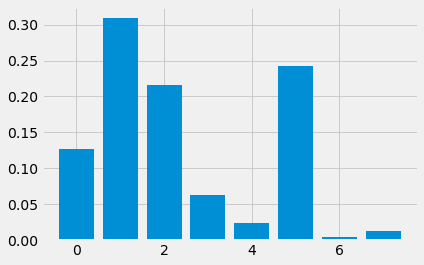

In [78]:
# get importance
importance = model_dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

0 = Pclass,
1 = Sex,
2 = Age, dst

yang paling tinggi berarti feature yang penting dalam model kita, sehingga diusahakan tidak ada data yang kosong